# MathAData - Module introduction à l'IA

## Classification des images de 2 et de 7

!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.  
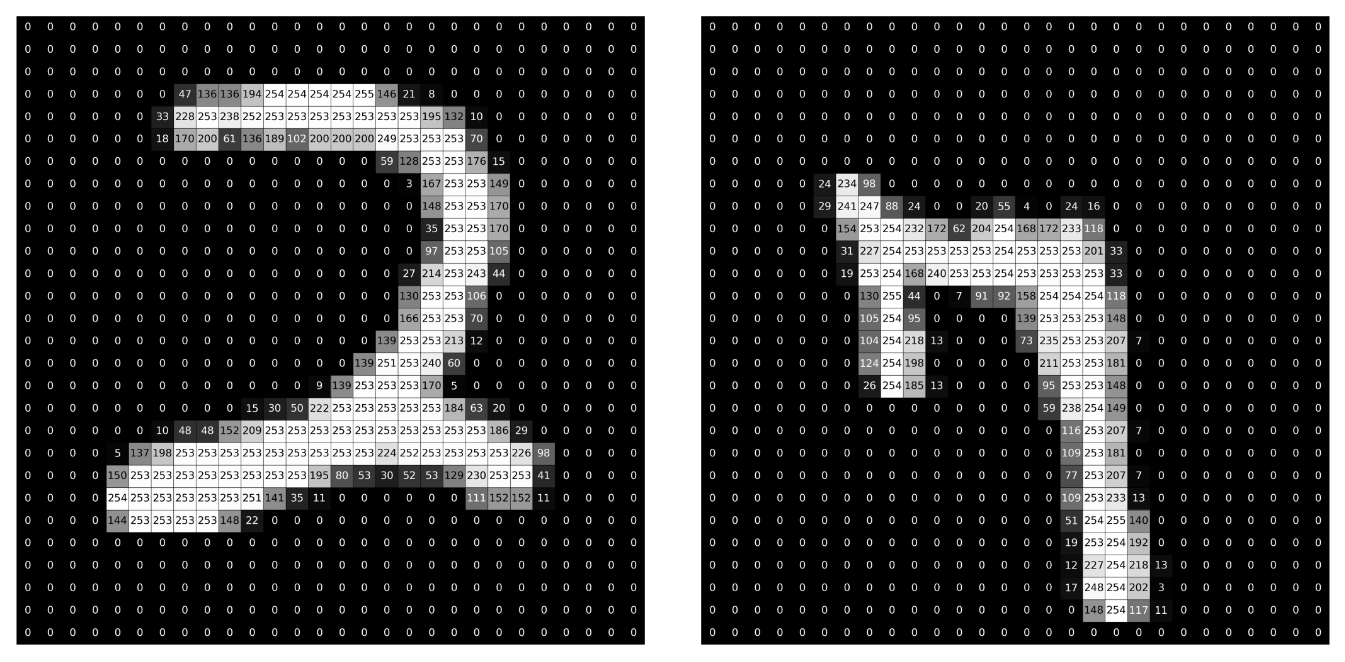  
!!!

!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem;">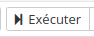</span> ou les touches Majuscule puis Entrée de votre clavier.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem;"></span>  
!!!

In [1]:
from utilitaires_intro import *
from utilitaires_mnist import *

Chargement de la base de donnée d'images en cours...
Images chargées !


## Point de départ

!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
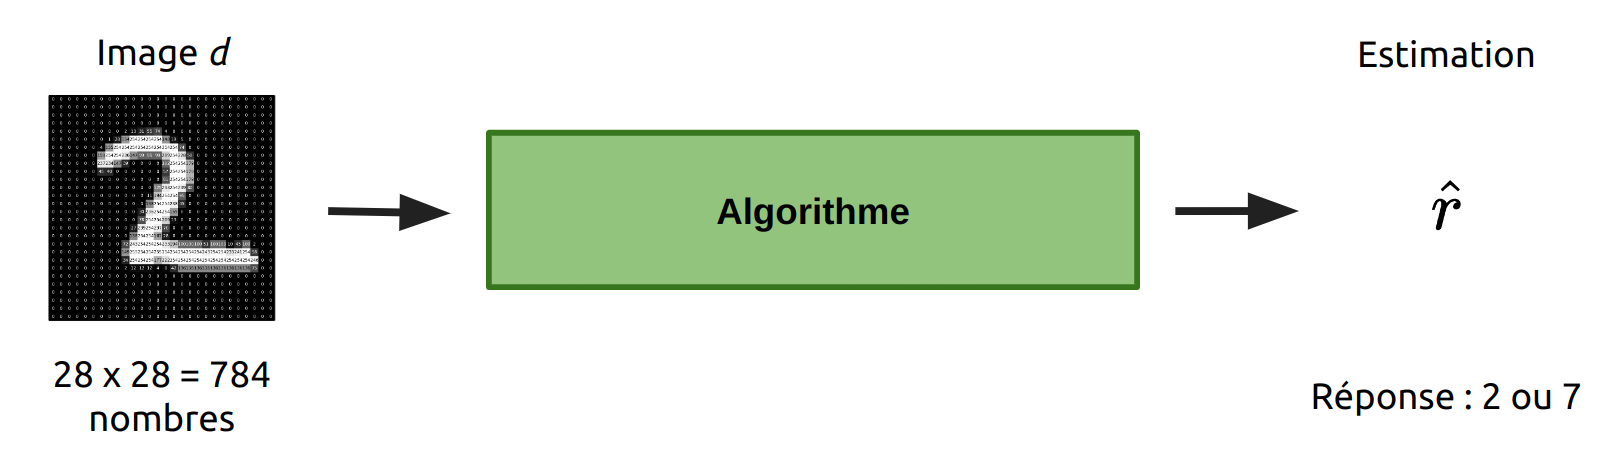  
!!!
!!! abstract Premier essai : algorithme très simple qui renvoie toujours 2.   
Pour commencer, nous allons construire un algorithme très simple **qui renvoie toujours 2**.  
!!!

In [3]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! info Le score : un moyen d'évaluer votre algorithme  
Le score est le pourcentage d'erreur de votre algorithme. Plus il est bas meilleur est votre solution.  
  
$$\text{score} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}} \times 100$$  
Une image mal classée est une image pour laquelle l'algorithme a donné une prédiction différente de la vraie classe de l'image:  
$$\hat r \neq r$$  
!!!
!!! tip Base de donnée  
Nous avons environ 12 000 images. **Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher l'image correspondante et vous déplacer avec les flèches haut et bas du clavier.  
!!!

In [4]:
affichage_banque()

validation_execution_calcul_score()

!!! question Quel est le score de l'algorithme sur les 10 premières images ?  
Calculez le pourcentage d'erreur de l'algorithme. **Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!

In [6]:
score_10 = 30

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_fixe()

Bravo, ton algorithme actuel a fait 3 erreurs sur les 10 premières images, soit 30% d'erreur


!!! tip Score sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 12 000 images.  
!!!

In [20]:
calculer_score_etape_1()

Calcul du score en cours...
Nouveau score : 51.4%
Voici les prédictions r^ de ton algorithme pour chaque image


## II. Image numérique

!!! abstract Qu'est ce qu'une image ?  
Pour améliorer notre score notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
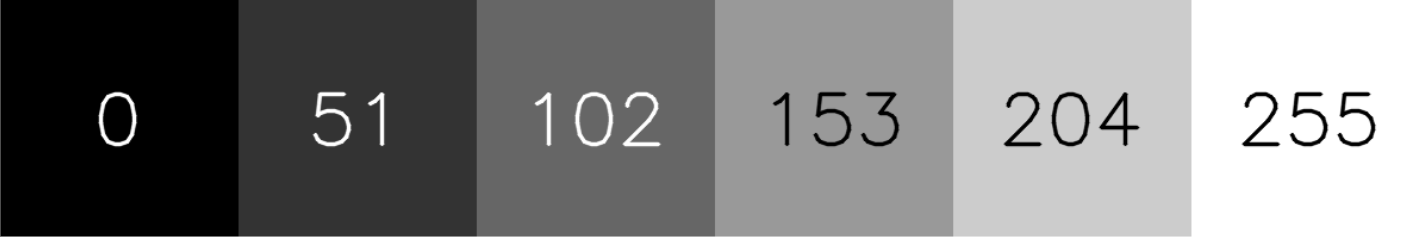  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!

In [22]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,5,49,160,190,255,106,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,9,47,131,188,254,254,254,254,254,187,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,37,151,104,211,254,254,254,252,241,197,113,116,254,187,0,0,0,0,0,0,0,0,0


!!! question Quelle est la valeur du pixel (17,15) ?  
Lisez dans le tableau la valeur du pixel en position (17,15) et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
La première coordonnée est le numéro de ligne, la deuxième le numéro de colonne.  
!!!

In [23]:
pixel = 254

# NE PAS TOUCHER CETTE LIGNE
validation_question_pixel()

Bravo, c'est la bonne réponse !


!!! question Transformez le pixel (17,15) en pixel noir  
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!

In [24]:
d[17,15] = 0

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

Bravo, le pixel est devenu noir


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,5,49,160,190,255,106,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,9,47,131,188,254,254,254,254,254,187,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,37,151,104,211,254,254,254,252,241,197,113,116,254,187,0,0,0,0,0,0,0,0,0


## Calcul d'une caractéristique

!!! info Caractéristique d'une image  
Pour améliorer notre score, notre algorithme doit maintenant utiliser l'image au lieu de répondre au hasard.  
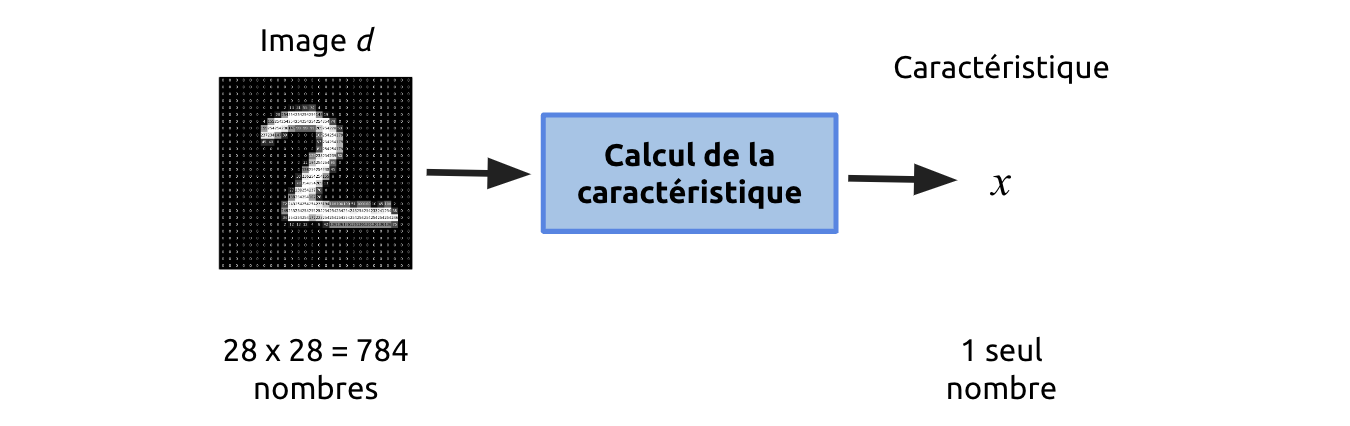  
La caractéristique notée $x$ permet de résumer l'image en une seule information.  
!!!

!!! tip La moyenne  
Pour résumer les valeurs de certains pixels en une seule valeur, on fait la moyenne de ces pixels.  
!!!

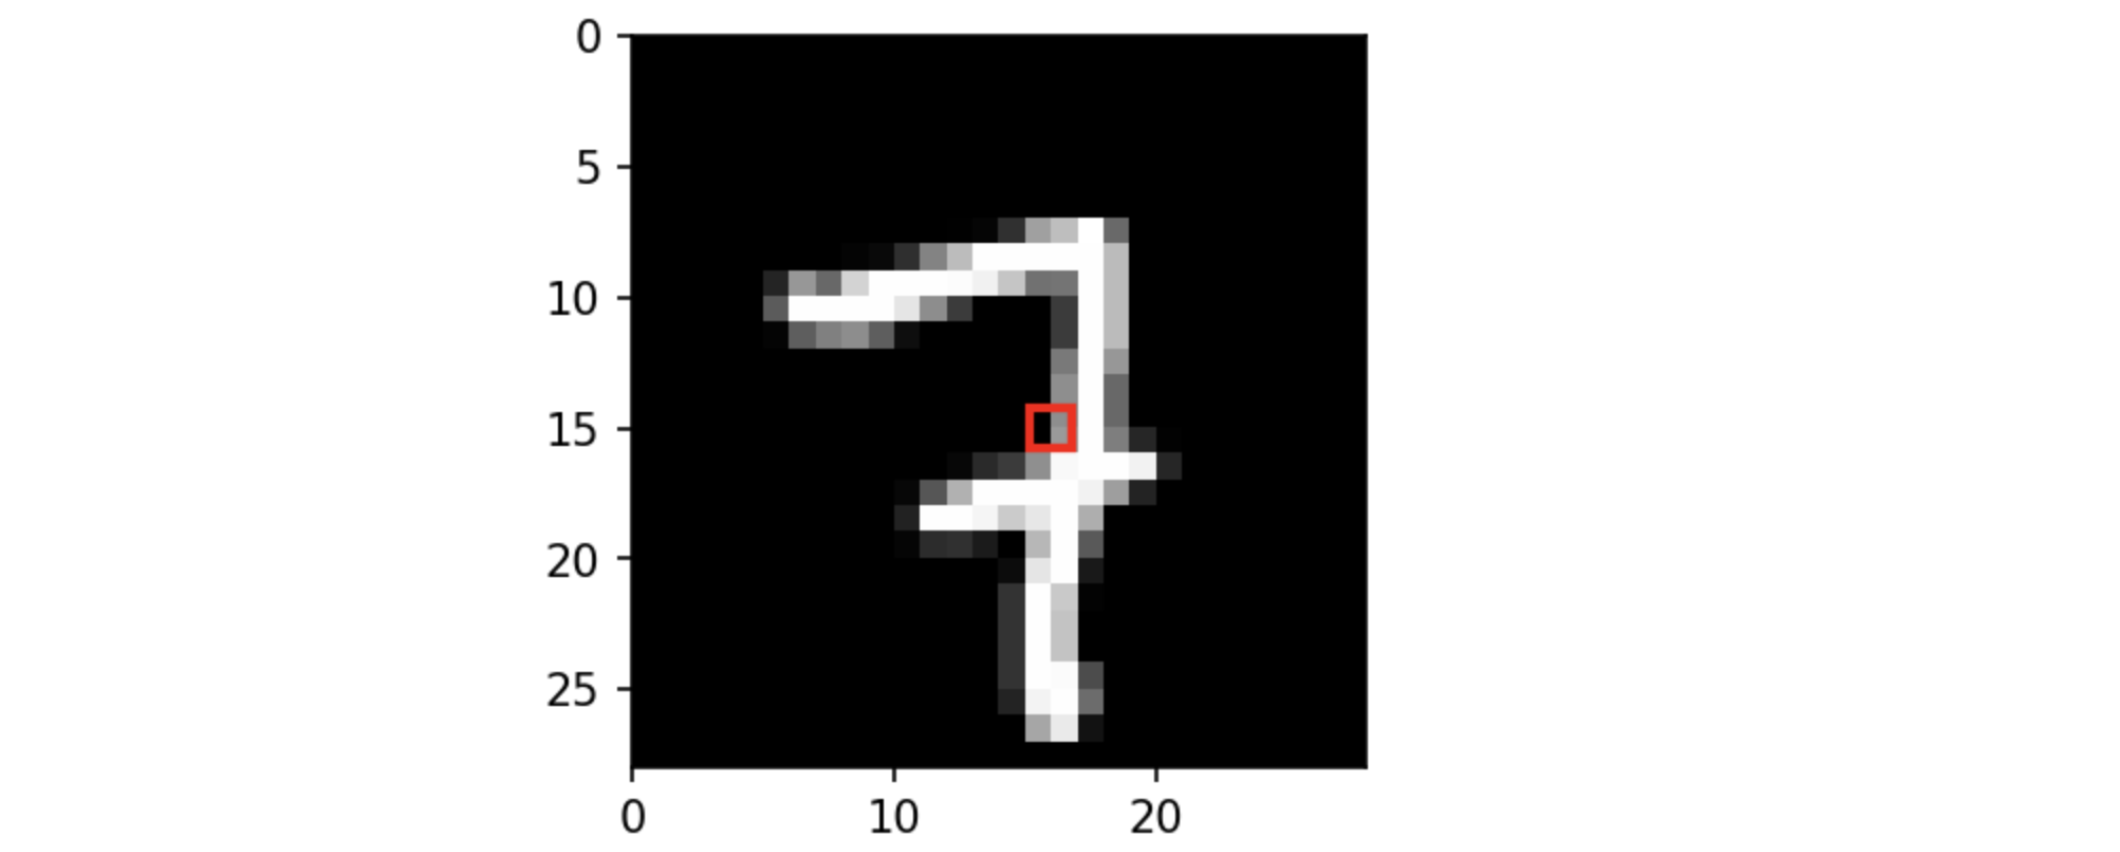  
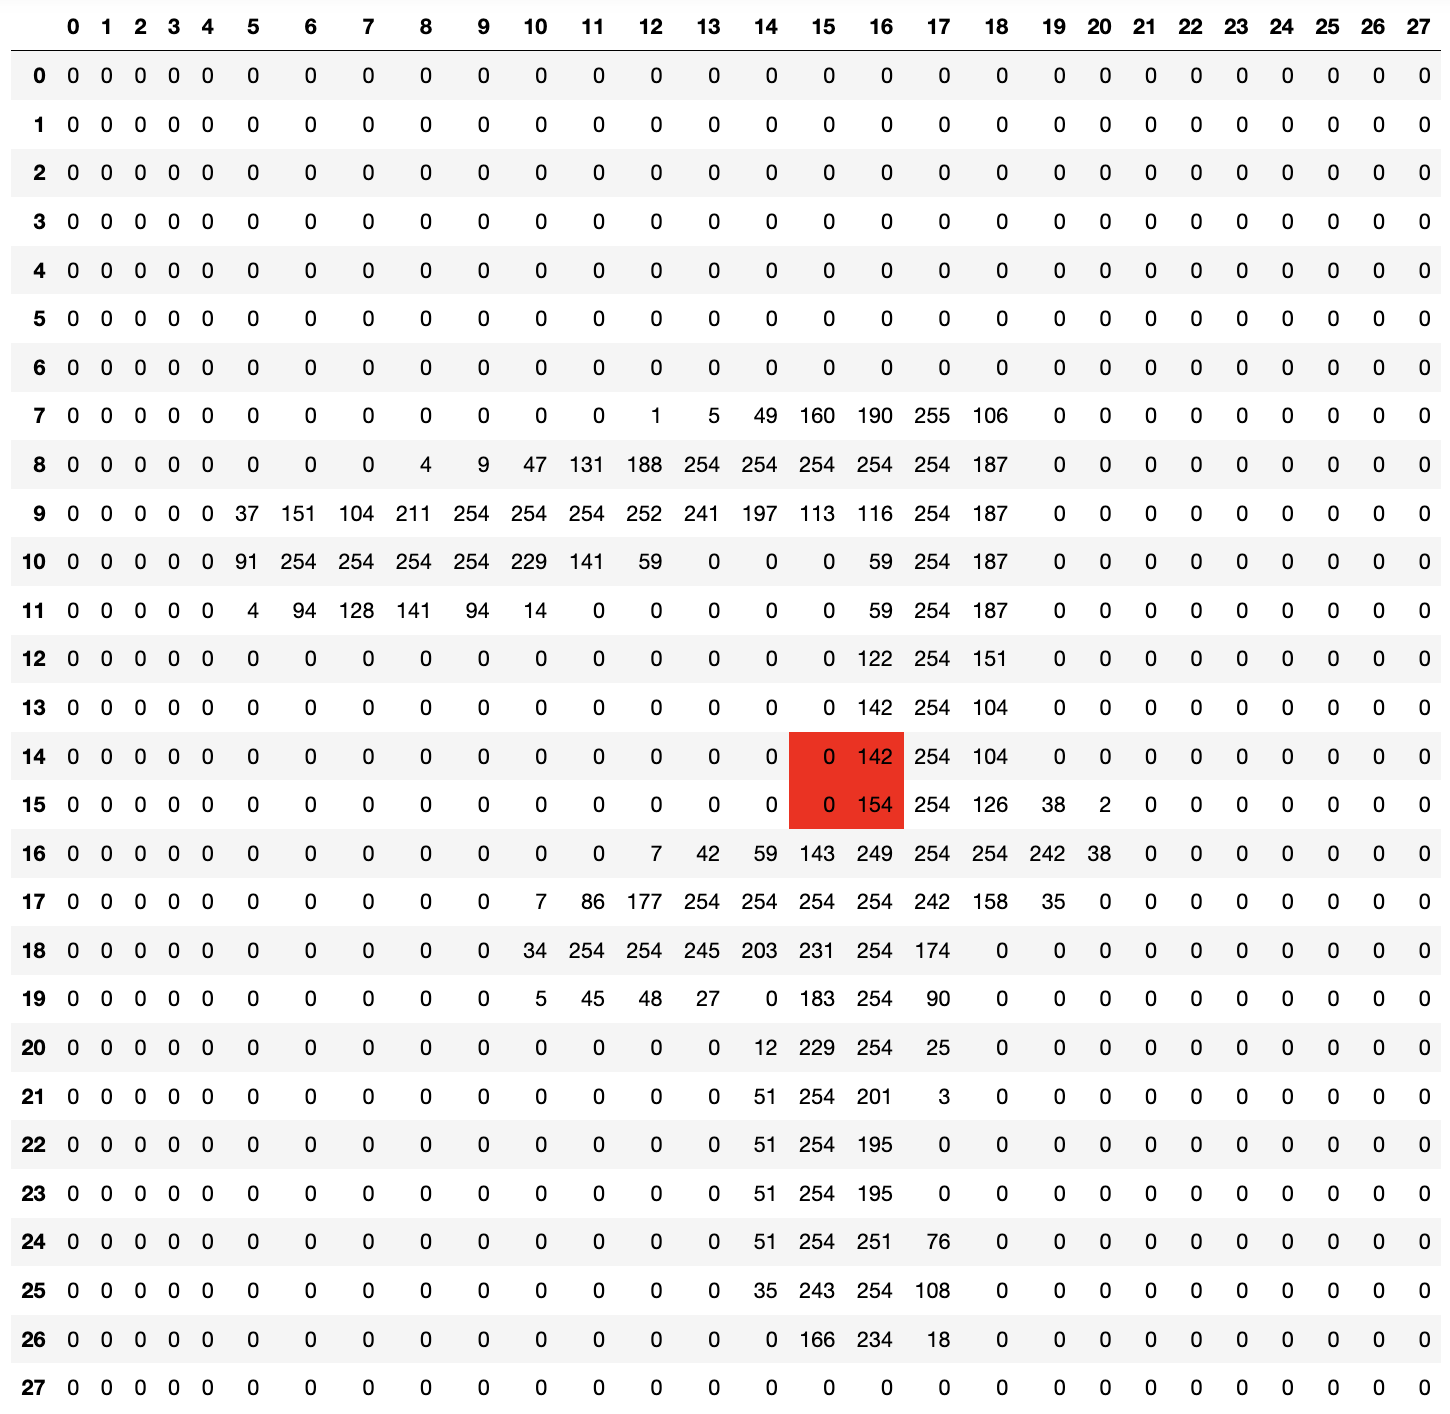
!!! question Calculez la moyenne sur les pixels rouges  
Calculez la moyenne des pixels de la zone surlignée en rouge. Donnez votre réponse **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
!!!

In [25]:
k = 74

# NE PAS TOUCHER CETTE LIGNE
validation_question_moyenne()

Bravo, la moyenne vaut en effet (142 + 154 + 0 + 0) / 4 = 74


## Classificateur

!!! info Classification  
La classification est la dernière étape de l'algorithme. On répond 2 ou 7 en fonction de la caractéristique $x$.  
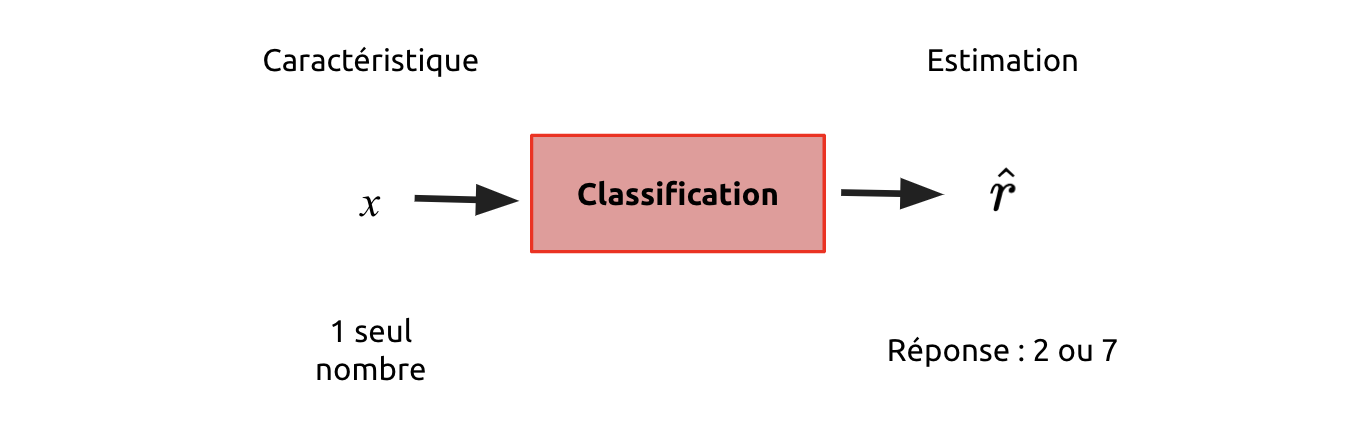  
**On compare $x$ à un seuil $t$** à définir : $\hat{r} = \left\{ \begin{array}{ll} 2 & \mbox{si $x \leq t$} \\ 7 & \mbox{si $x > t$} \end{array} \right.$ ou l'inverse : $\hat{r} = \left\{ \begin{array}{ll} 7 & \mbox{si $x \leq t$} \\ 2 & \mbox{si $x > t$} \end{array} \right.$  
!!!

In [26]:
affichage_banque(carac=1)

validation_execution_affichage_classif()

!!! question La caractéristique est-elle plus élevée pour les 2 ou pour les 7 ?  
Regardez les dix premières lignes du tableau et indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
!!!

In [28]:
r_petite_caracteristique = 7
r_grande_caracteristique = 2

# NE PAS TOUCHER CETTE LIGNE
validation_question_ordre_caracteristique()

Bravo, c'est la bonne réponse !


!!! question Choisissez un seuil $t$.  
Regardez à nouveau les dix premières lignes du tableau et choisissez un seuil $t$ pour séparer les 2 et les 7  
!!!

In [29]:
# Remplacez les ... avec la valeur que vous avez choisi
t = 30

# NE PAS TOUCHER CETTE LIGNE
validation_question_seuil()

Ton seuil est correct ! Il n'est pas forcément optimal, on verra dans la suite comment l'optimiser.


!!! tip Fonction finale  
À partir de vos deux réponses précédentes, on peut coder la fonction `classification` :  
!!!

In [30]:
# Fonction répondant au problème en fonction de la caractéristique x de l'image que l'on doit classer
def classification(x, t):
    # Comparaison de la caractéristique au seuil t
    if x <= t:
        return r_petite_caracteristique
    else:
        return r_grande_caracteristique
    
validation_execution_classif()

!!! abstract Notre algorithme est complet !  
Avec les quelques étapes précédentes, nous pouvons construire un algorithme complet :  
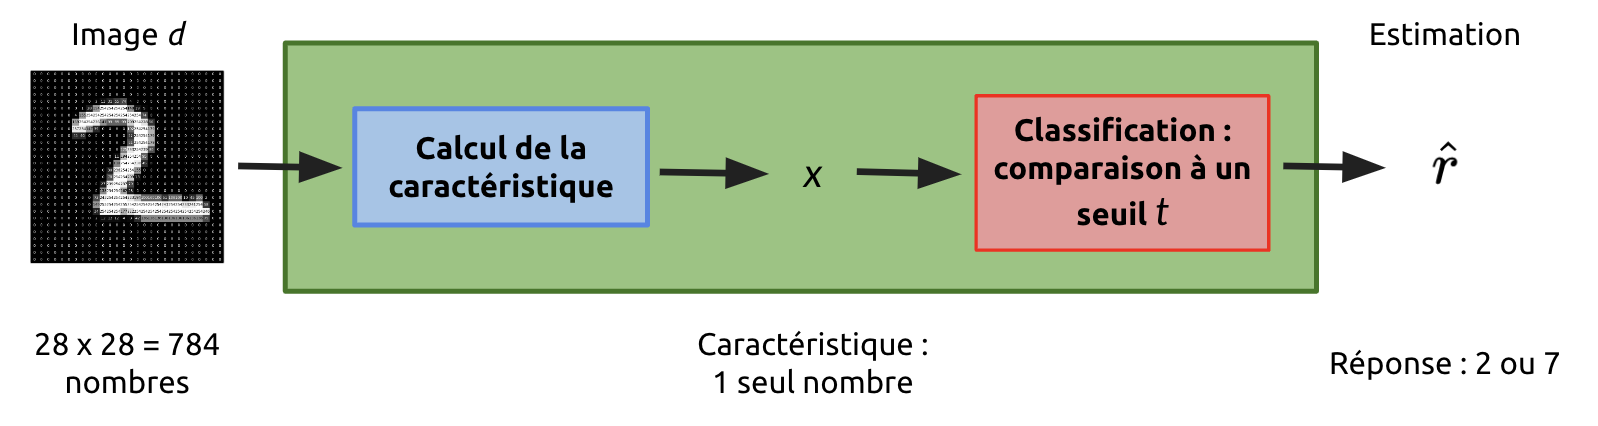  
En effet, nous sommes capable de calculer une caractéristique à partir de l'image, puis décider si l'image représente un 2 ou 7 en regardant cette caractéristique  
!!!

## Calcul de l'erreur d'entraînement pour ce paramètre

!!! tip Exécutez la cellule suivante  
Exécutez la cellule suivante pour réafficher les valeurs de la caractéristique pour les images de la base d'entraînement.  
!!!

In [31]:
affichage_banque(carac=1)

validation_execution_affichage_score()

!!! question Quel est votre pourcentage d'erreur sur les 10 premières images ?  
Avec le seuil que tu as choisi, combien d'erreurs l'algorithme a-t-il fait sur les 10 premières images ? (voir tableau ci-dessus). En déduire le pourcentage d'erreur à compléter dans la cellule suivante.  
!!!

In [34]:
e_train_10 = 10

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_seuil()

Bravo, ton algorithme actuel a fait 1 erreurs sur les 10 premières images, soit 10% d'erreur


!!! tip Calculez votre erreur sur tout l'ensemble d'entraînement  
Exécutez la cellule suivante pour calculer votre pourcentage d'erreur avec la caractéristique et le seuil que vous avez choisi  
!!!

In [35]:
calculer_score_carac()

Calcul du score en cours...
Nouveau score : 32.0%
Voici les prédictions r^ de ton algorithme pour chaque image


!!! abstract Améliorations  
Nous allons voir dans les prochaines étapes les différentes possibilités pour améliorer votre score.  
!!!

## Optimisation du seuil $t$

!!! abstract Choix du seuil  
Dans l'étape précédente, vous avez choisi un seuil $t$ en fonction de vos observations sur les 10 premières images. Alors que l'ensemble d'entraînement en contient 12 000 !  
On peut donc trouver un meilleur seuil en prenant en compte les 12 000 images de l'ensemble d'entraînement.  
!!!
!!! info Minimum de la fonction erreur  
Pour trouver le meilleur seuil $t$, on peut calculer le pourcentage d'erreur pour plusieurs seuils différents. On prendra celui qui donne la plus petite erreur.  
Executez la cellule suivante pour tracer le graphique du pourcentage d'erreur en fonction du seuil $t$  
!!!

In [37]:
tracer_erreur()
validation_execution_graph_erreur()

!!! question Quelle valeur de $t$ permet d'obtenir la plus petite erreur ?  
En observant le graphique, complétez dans la cellule suivante la valeur de $t$ qui correspond au minimum de la fonction erreur  
!!!

In [40]:
t = 34

# NE PAS TOUCHER CETTE LIGNE
calculer_score_seuil_optimise()

Bravo, c'est la bonne réponse ! Ton seuil est maintenant optimal


## Amélioration de la caractéristique : faites mieux !


!!! abstract Comment faire mieux ?  
En optimisant le seuil, vous avez pu obtenir le meilleur score possible **en utilisant comme caractéristique la moyenne de tous les pixels de l'image.**  
Le seul moyen pour réduire encore le taux d'erreur est maintenant de trouver une meilleure caractéristique !  
!!!

##  Moyenne sur une partie de l'image



!!! info Utiliser la moyenne plus intelligemment  
Une première piste pour améliorer votre caractéristique : utiliser la moyenne seulement sur une zone de l'image qui vous parait intéressante pour distinguer les 2 et les 7.  
!!!

!!! question Choisissez la zone de l'image sur laquelle vous allez calculer la moyenne  
**Exécutez la cellule suivante** puis sélectionnez avec la souris un rectangle sur une des images. La caractéristique sera la moyenne des pixels dans ce rectangle.  
!!!  
!!! info Conseil  
N'oubliez pas que la caractéristique doit être la plus différente possible selon que l'image soit un 2 ou 7. Regardez les images pour trouver une zone qui diffère le plus entre les deux chiffres.  
!!!

In [41]:
afficher_customisation()

validation_execution_afficher_customisation()

!!! question Mettez a jour les paramètres de classification  
Indiquez dans la cellule suivante le nouveau seuil à utiliser. Attention, changer r_petite_caractéristique et r_grande_caracteristique change le graphique.  
!!!

In [193]:
# Remplacez si vous voulez changez l'ordre
r_petite_caracteristique = 7
r_grande_caracteristique = 2

# NE PAS TOUCHER CETTE LIGNE
update_graph_erreur()

# Remplacez avec le meilleur seuil t lu sur le graph
t = 62

!!! tip Calculez votre score avec votre caractéristique  
Exécutez la cellule suivante pour calculer le nouveau score  
!!!

In [194]:
calculer_score_custom()

Calcul du score en cours...
Nouveau score : 27.8%
Voici les prédictions r^ de ton algorithme pour chaque image
